In [ ]:
from autograd import grad
import autograd.numpy as anp


# first derivative
def forward_diff(func, x, h=0.00001):
    return (func(x + h) - func(x)) / h


def central_diff(func, x, h=0.00001):
    return (func(x + h / 2) - func(x - h / 2)) / h


def extrapolated_diff(func, x, h=0.00001):
    return (4 * central_diff(func, x, h / 2) - central_diff(func, x, h)) / 3


# second derivative
def forward_diff_2(func, x, h=0.00001):
    return (func(x + 2 * h) + func(x) - 2 * func(x + h)) / (h * h)


def central_diff_2(func, x, h=0.00001):
    return (func(x + h) + func(x - h) - 2 * func(x)) / (h * h)


def extrapolated_diff_2(func, x, h=0.00001):
    return (4 * central_diff_2(func, x, h / 2) - central_diff_2(func, x, h)) / 3


# third derivative
def forward_diff_3(func, x, h=0.00001):
    return (func(x + 3 * h) + 3 * func(x + h) - (func(x) + 3 * func(x + 2 * h))) / (h * h * h)


def central_diff_3(func, x, h=0.00001):
    return (func(x + 2 * h) - 2 * func(x + h) + 2 * func(x - h) - func(x - 2 * h)) / (2 * h * h * h)


def extrapolated_diff_3(func, x, h=0.00001):
    return (8 * central_diff_3(func, x, h / 2) - central_diff_3(func, x, h)) / 7


# autograd method
grad_sin = grad(anp.sin)
grad_grad_sin = grad(grad_sin)
grad_grad_grad_sin = grad(grad_grad_sin)


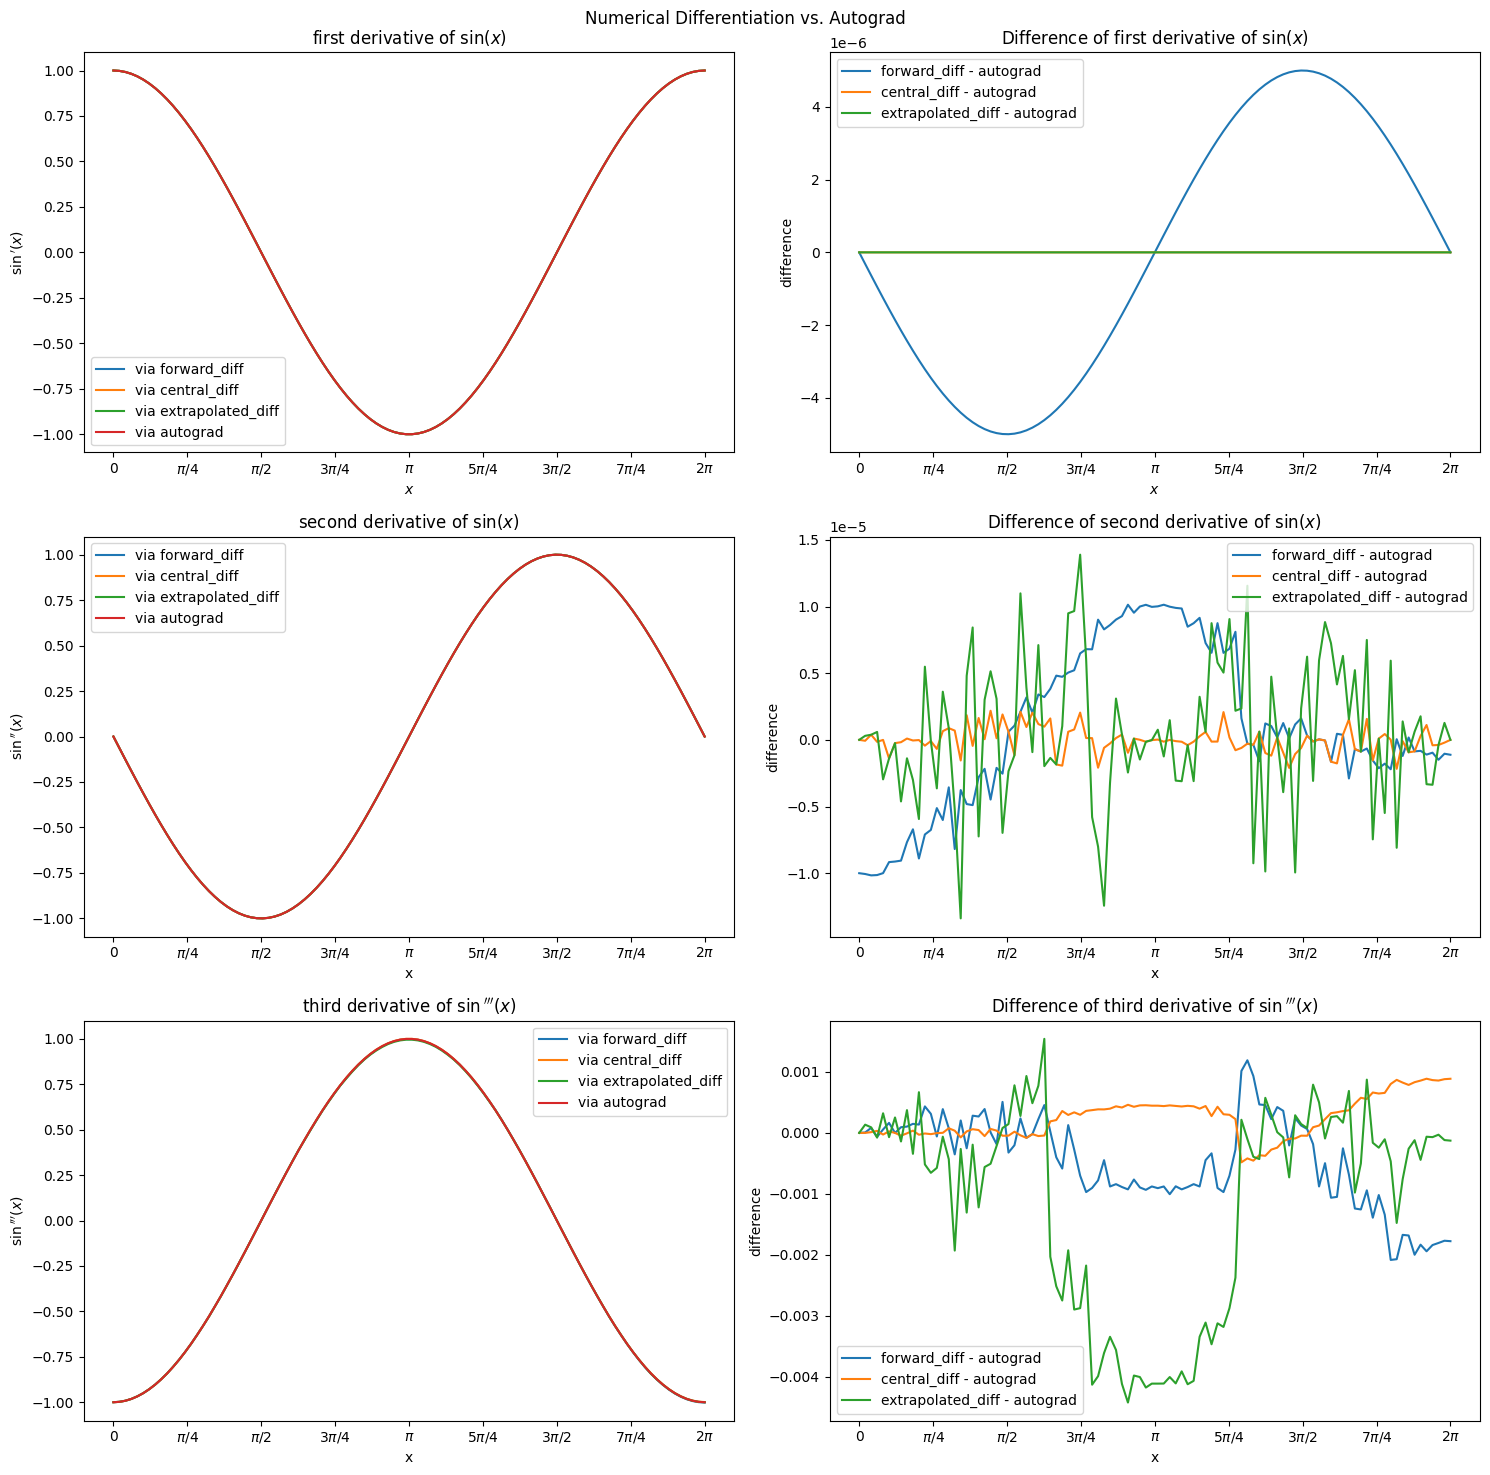

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("Numerical Differentiation vs. Autograd")

xdata = np.linspace(0, 2 * np.pi, 100)
xticks = np.linspace(0, 2 * np.pi, 9)
xname = ["0", "$\pi/4$", "$\pi/2$", "$3\pi/4$", "$\pi$", "$5\pi/4$", "$3\pi/2$", "$7\pi/4$", "$2\pi$"]

# first derivative of sin(x)
# fig1: compare the three methods with autograd
ax1.set_title("first derivative of $\sin(x)$")
ax1.set_xlabel("$x$")
ax1.set_xticks(xticks, xname)
ax1.set_ylabel("$\sin'(x)$")

current_h = 0.00001
y1 = [forward_diff(anp.sin, x, current_h) for x in xdata]
y2 = [central_diff(anp.sin, x, current_h) for x in xdata]
y3 = [extrapolated_diff(anp.sin, x, current_h) for x in xdata]
y4 = [grad_sin(x) for x in xdata]

ax1.plot(xdata, y1, label="via forward_diff")
ax1.plot(xdata, y2, label="via central_diff")
ax1.plot(xdata, y3, label="via extrapolated_diff")
ax1.plot(xdata, y4, label="via autograd")

ax1.legend(loc="best")


# fig2: show the difference between the three methods and autograd
ax2.set_title("Difference of first derivative of $\sin(x)$")
ax2.set_xlabel("$x$")
ax2.set_xticks(xticks, xname)
ax2.set_ylabel("difference")
# ax2.set_yscale('log')

diff1 = [i - j for i, j in zip(y1, y4)]
diff2 = [i - j for i, j in zip(y2, y4)]
diff3 = [i - j for i, j in zip(y3, y4)]

ax2.plot(xdata, diff1, label="forward_diff - autograd")
ax2.plot(xdata, diff2, label="central_diff - autograd")
ax2.plot(xdata, diff3, label="extrapolated_diff - autograd")

ax2.legend(loc="best")


# second derivative of sin(x)
# fig3: compare the three methods with autograd
ax3.set_title("second derivative of $\sin(x)$")
ax3.set_xlabel("x")
ax3.set_xticks(xticks, xname)
ax3.set_ylabel("$\sin''(x)$")

current_h = 0.00001
y1 = [forward_diff_2(anp.sin, x, current_h) for x in xdata]
y2 = [central_diff_2(anp.sin, x, current_h) for x in xdata]
y3 = [extrapolated_diff_2(anp.sin, x, current_h) for x in xdata]
y4 = [grad_grad_sin(x) for x in xdata]

ax3.plot(xdata, y1, label="via forward_diff")
ax3.plot(xdata, y2, label="via central_diff")
ax3.plot(xdata, y3, label="via extrapolated_diff")
ax3.plot(xdata, y4, label="via autograd")

ax3.legend(loc="best")


# fig4: show the difference between the three methods and autograd
ax4.set_title("Difference of second derivative of $\sin(x)$")
ax4.set_xlabel("x")
ax4.set_xticks(xticks, xname)
ax4.set_ylabel("difference")
# ax4.set_yscale('log')

diff1 = [i - j for i, j in zip(y1, y4)]
diff2 = [i - j for i, j in zip(y2, y4)]
diff3 = [i - j for i, j in zip(y3, y4)]

ax4.plot(xdata, diff1, label="forward_diff - autograd")
ax4.plot(xdata, diff2, label="central_diff - autograd")
ax4.plot(xdata, diff3, label="extrapolated_diff - autograd")

ax4.legend(loc="best")


# third derivative of sin(x)
# fig5: compare the three methods with autograd
ax5.set_title("third derivative of $\sin'''(x)$")
ax5.set_xlabel("x")
ax5.set_xticks(xticks, xname)
ax5.set_ylabel("$\sin'''(x)$")

current_h = 0.0001
y1 = [forward_diff_3(anp.sin, x, current_h) for x in xdata]
y2 = [central_diff_3(anp.sin, x, current_h) for x in xdata]
y3 = [extrapolated_diff_3(anp.sin, x, current_h) for x in xdata]
y4 = [grad_grad_grad_sin(x) for x in xdata]

ax5.plot(xdata, y1, label="via forward_diff")
ax5.plot(xdata, y2, label="via central_diff")
ax5.plot(xdata, y3, label="via extrapolated_diff")
ax5.plot(xdata, y4, label="via autograd")

ax5.legend(loc="best")


# fig6: show the difference between the three methods and autograd
ax6.set_title("Difference of third derivative of $\sin'''(x)$")
ax6.set_xlabel("x")
ax6.set_xticks(xticks, xname)
ax6.set_ylabel("difference")
# ax6.set_yscale('log')

diff1 = [i - j for i, j in zip(y1, y4)]
diff2 = [i - j for i, j in zip(y2, y4)]
diff3 = [i - j for i, j in zip(y3, y4)]

ax6.plot(xdata, diff1, label="forward_diff - autograd")
ax6.plot(xdata, diff2, label="central_diff - autograd")
ax6.plot(xdata, diff3, label="extrapolated_diff - autograd")

ax6.legend(loc="best")


plt.tight_layout()  # adjust the layout
plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\i'
<>:28: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_24056/3405512727.py:28: SyntaxWarning: invalid escape sequence '\i'
  "\n\n $\int_0^{51\pi} \sin(x) \, dx$"


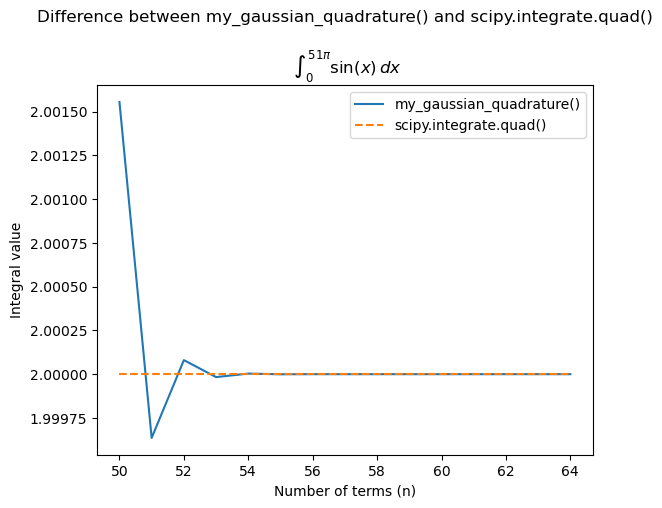

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate


def integrand(x):
    return np.sin(x)


def my_gaussian_quadrature(a=0, b=np.pi, f=np.sin, n=64):
    # 使用 NumPy 生成勒让德多项式的根和权重
    x, w = np.polynomial.legendre.leggauss(n)
    # 线性映射到区间 [a, b]
    t = 0.5 * (b - a) * x + 0.5 * (a + b)
    return 0.5 * (b - a) * np.sum(w * f(t))


# 积分上限是 51π
a, b = 0, 51 * np.pi

my_integral_result = [my_gaussian_quadrature(a=a, b=b, f=integrand, n=i) for i in range(50, 65)]
scipy_integral_result = [scipy.integrate.quad(integrand, a, b)[0] for _ in range(50, 65)]

# plot
fig, ax = plt.subplots()
ax.set_title(
    r"Difference between my_gaussian_quadrature() and scipy.integrate.quad()"
    "\n\n $\int_0^{51\pi} \sin(x) \, dx$"
)
ax.set_xlabel("Number of terms (n)")
ax.set_ylabel("Integral value")

ax.plot(range(50, 65), my_integral_result, label="my_gaussian_quadrature()")
ax.plot(range(50, 65), scipy_integral_result, label="scipy.integrate.quad()", linestyle="--")

ax.legend(loc="best")
plt.show()